In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/amresh/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
df = pd.read_csv('data/multiTimeline.csv',skiprows=1)

# top 5 rows
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [6]:
#change column name
df.columns = ['month', 'diet', 'gym', 'finance'] 
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43



Next, we will change the 'month' column into a DateTime data type and make it the index of the DataFrame.

Use pandas .to_datetime() to convert the 'month' column in to a DateTime.

In [7]:
df.month = pd.to_datetime(df.month)

# change to index
df.set_index('month',inplace=True)

# results
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


 
 we will plot data as 3 line plots on a single figure (one for each column, namely, 'diet', 'gym', and 'finance').
 
 

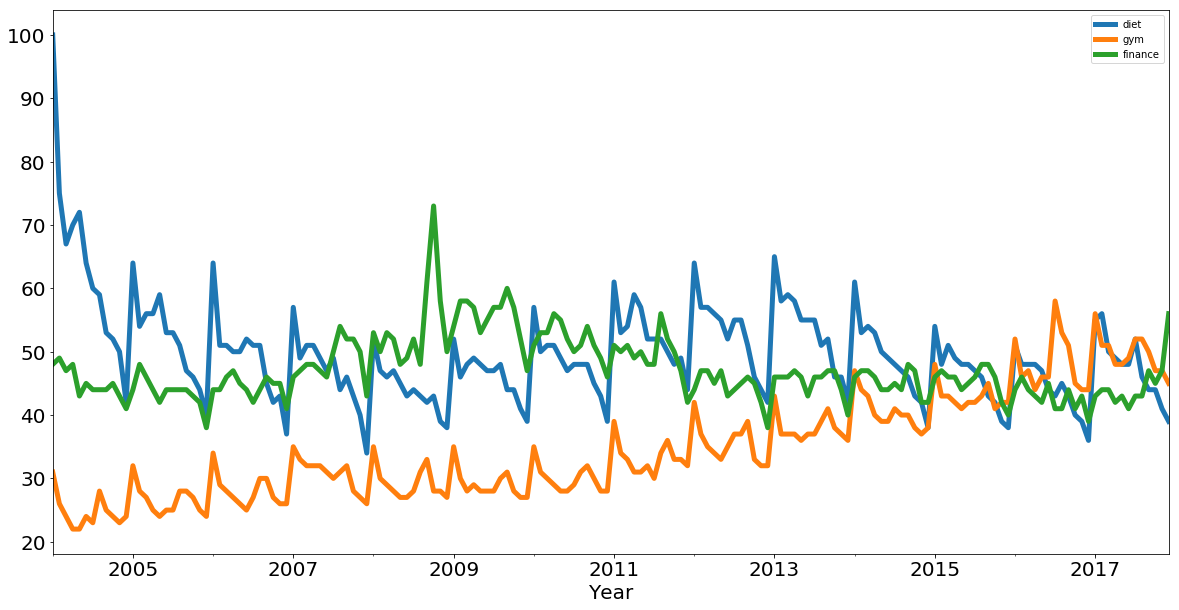

In [8]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Identifying Trends in Time Series data

There are many ways to identifying trends in time series. One popular way is by taking a rolling average, which means, for each time point, we take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

Here we check out this rolling average of 'diet' using the built-in pandas methods. 
When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality.

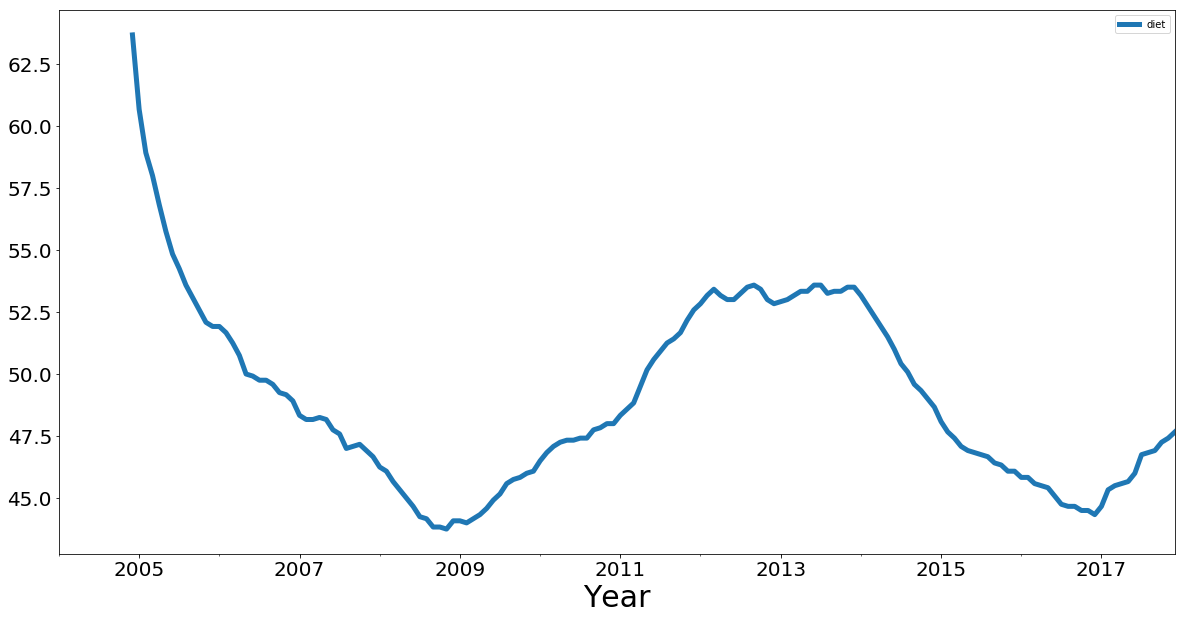

In [10]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=30);

Same way we can also plot the rolling average of 'gym' with the same window size as the 'diet' data:

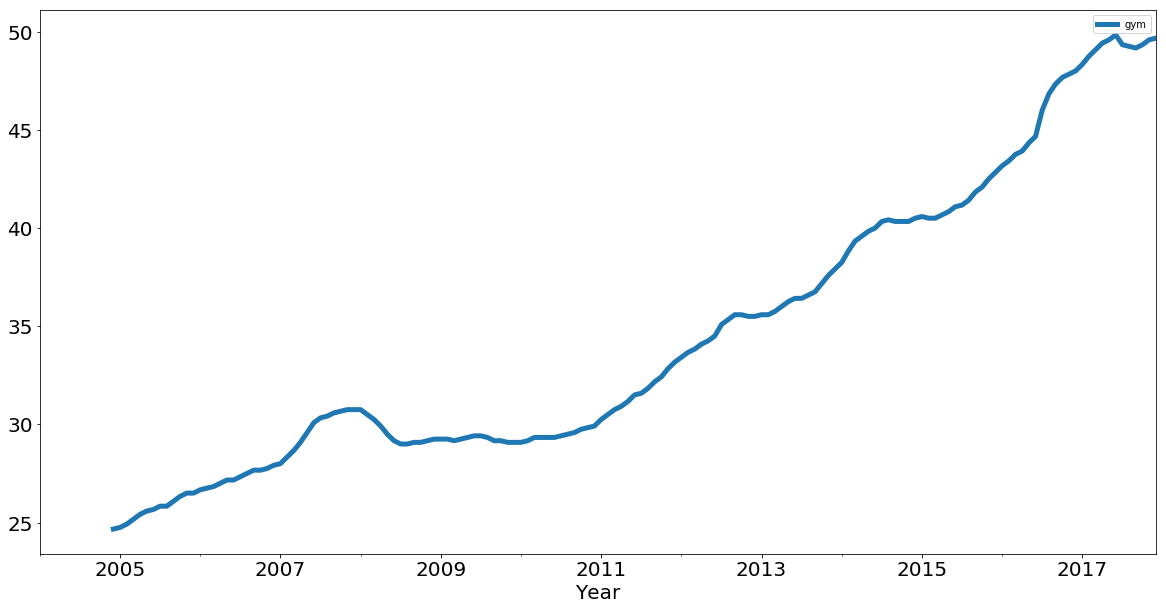

In [11]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#### Compare gym and diet trends

plotting the trends of 'gym' and 'diet' on a single figure:


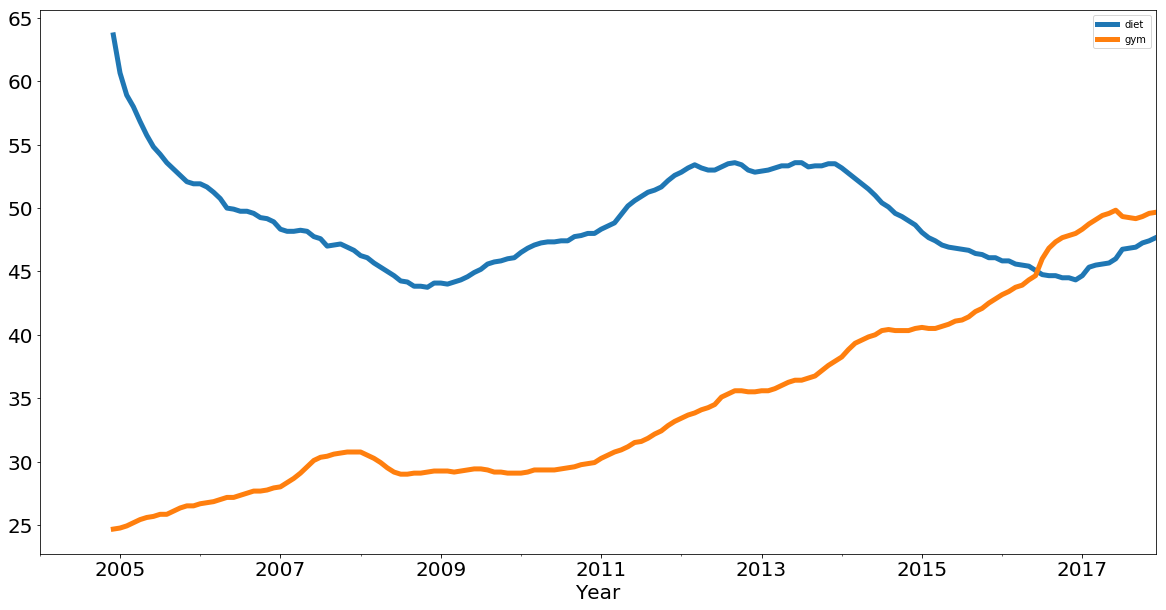

In [13]:
df_dg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_dg.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


df_dg that has two columns with the rolling average of 'diet' and 'gym'.
We used the pd.concat() function, which takes a list of the columns as a first argument and, since we want to concatenate them as columns, we also added the axis argument, which is set to 1.

Above plot shows increse in gym trend compared to diet as years goes. and we can see that diet potentially has some form of seasonality, where gym is increasing.

#### Seasonal Patterns in Time Series Data

One way to think about the seasonal components to the time series of  data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where we look at the difference between successive data points (called "first-order differencing", because we only looking at the difference between one data point and the one before it).

##### First-order differencing

You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'diet' Series:

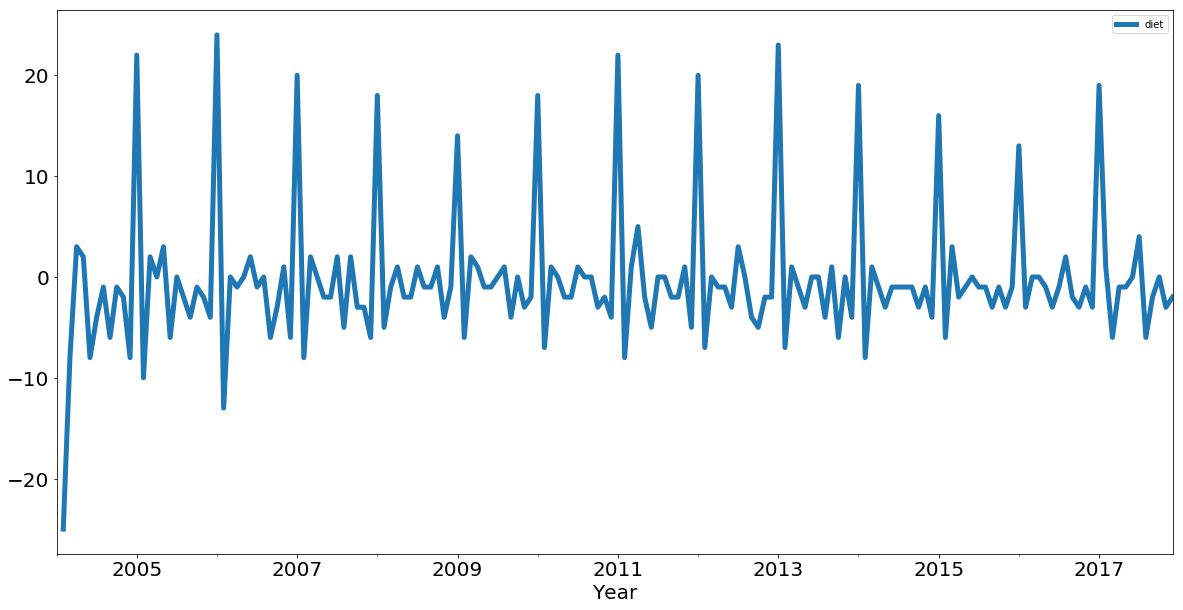

In [14]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


in above plot we have removed much of the trend and can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item. 

#### Periodicity and Autocorrelation

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months. 

Autocorrelation is correlation within a dataset and can indicate a trend.For example, if we have a lag of one period, we can check if the previous value influences the current value. For that to be true, the autocorrelation value has to be pretty high.

we will again plot all your time series to remind yourself of what they look like:

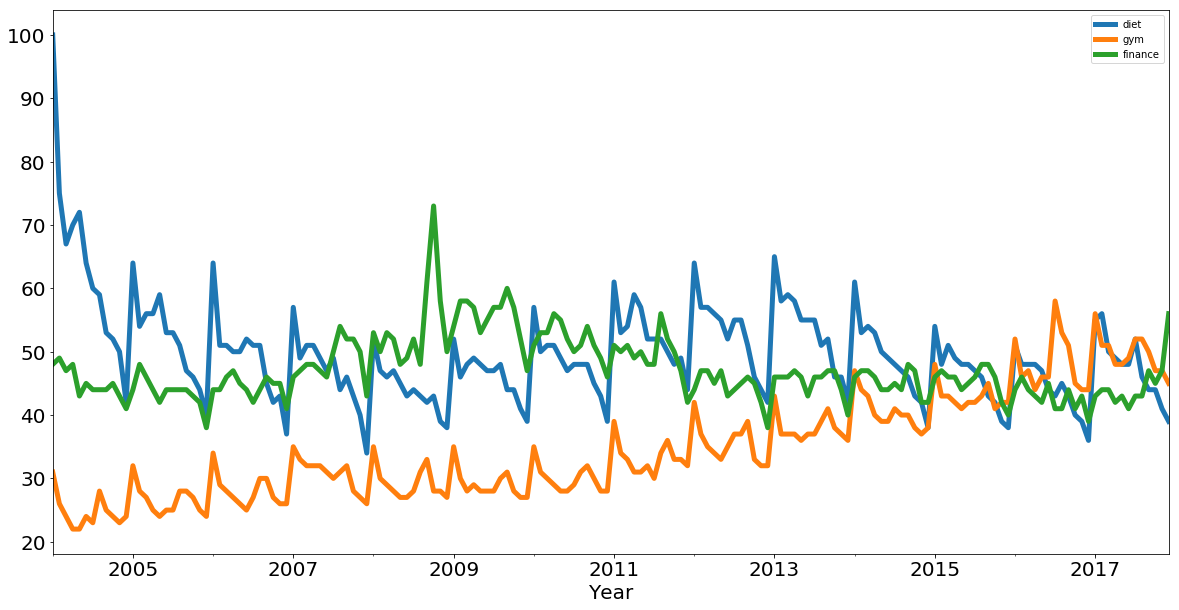

In [15]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

After that, compute the correlation coefficients of all of these time series with the help of .corr()


In [16]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


What this tells us:

if we focus on 'diet' and 'gym'; They are negatively correlated. That's very interesting! Remember that we have a seasonal and a trend component. From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated. 

Now we plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

Start off by plotting the first-order differences with the help of .diff() and .plot():

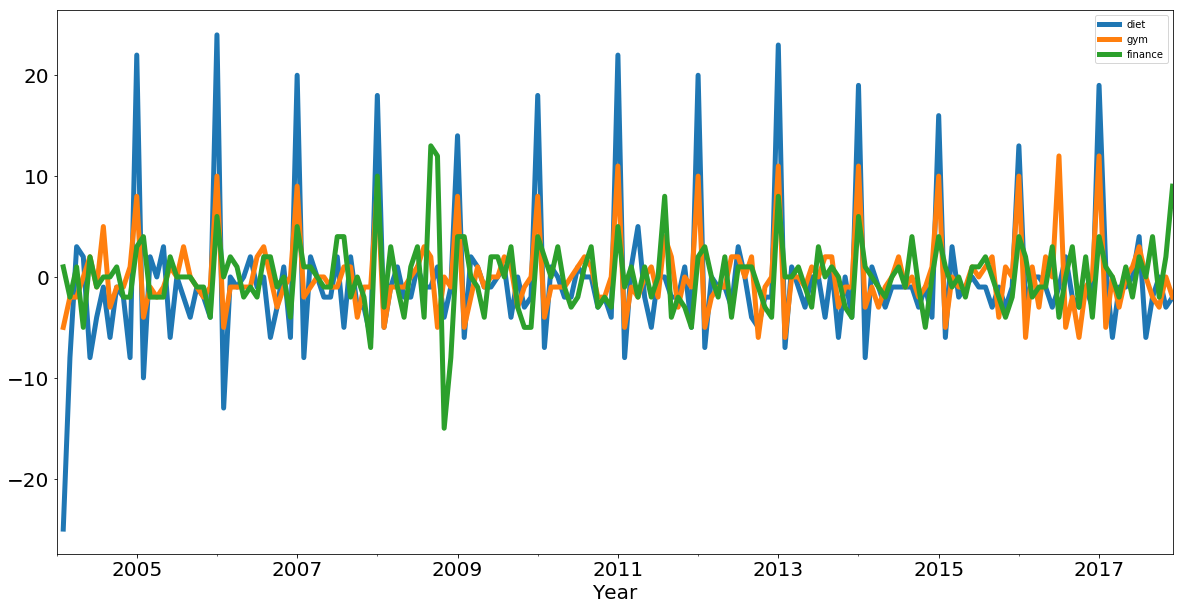

In [17]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


We see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:


In [18]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


Now, we can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.76. 


##### Conclusion
In this part we have covered a lot of ground! You checked out Google trends data of keywords 'diet', 'gym' and looked cursorily at 'finance' to see how they vary over time. You covered concepts such as seasonality, trends and  correlation.